## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos. 

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia. 

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [116]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

In [117]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [118]:
X_train = data_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = data_train['Survived']
X_test = data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [119]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [120]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [121]:
X_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [122]:
X_train.loc[X_train['Fare'] < 32.204208, 'Fare'] = 0
X_train.loc[X_train['Fare'] >= 32.204208, 'Fare'] = 1
X_test.loc[X_test['Fare'] < 32.204208, 'Fare'] = 0
X_test.loc[X_test['Fare'] >= 32.204208, 'Fare'] = 1
X_train['Fare']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [123]:
X_train['Fare'].unique()

array([0., 1.])

In [124]:
X_train = pd.get_dummies(X_train)
X_train.fillna(0, inplace = True)
X_test = pd.get_dummies(X_test)
X_test.fillna(0, inplace = True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0.0,0,1,0,0,1
1,1,38.0,1,0,1.0,1,0,1,0,0
2,3,26.0,0,0,0.0,1,0,0,0,1
3,1,35.0,1,0,1.0,1,0,0,0,1
4,3,35.0,0,0,0.0,0,1,0,0,1


In [125]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train) # Training model
predictions = model.predict(X_test) # Test model

In [126]:
df = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': predictions})

In [127]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [128]:
df.to_csv('y_predictions.csv', sep=',', encoding='utf-8', index=False)

[Text(0.5168269230769231, 0.9166666666666666, 'X[5] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2644230769230769, 0.75, 'X[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.14423076923076922, 0.5833333333333334, 'X[1] <= 53.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[1] <= 0.46\ngini = 0.487\nsamples = 100\nvalue = [58, 42]'),
 Text(0.038461538461538464, 0.25, 'X[4] <= 0.5\ngini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.11538461538461539, 0.25, 'X[1] <= 17.5\ngini = 0.498\nsamples = 79\nvalue = [42, 37]'),
 Text(0.09615384615384616, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1346153846153846, 0.08333333333333333, 'gini = 0.493\nsamples = 75\nvalue = [42, 33]'),


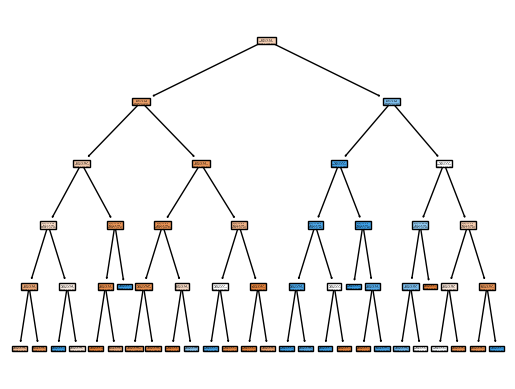

In [129]:
tree.plot_tree(model, filled=True)

In [ ]:
# tree.export_graphviz(model, out_file='titanic.dot',
#                    feature_names=['age', 'gender'], 
#                    class_names=sorted(y.unique()),
#                    label='all',
#                    rounded=True,
#                    filled=True)